<a href="https://colab.research.google.com/github/cineris/Real-Estate-Price-Prediction-using-Regression-in-Python/blob/main/dm_project_sem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Importing kaggle dependencies
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyasharma5","key":"68920d55be149ba9c605ade43bc83875"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importing datasets
!kaggle datasets download -d anushreepatil01/factors-effecting-housing-price-in-us

  0% 0.00/95.3k [00:00<?, ?B/s]
100% 95.3k/95.3k [00:00<00:00, 36.0MB/s]


In [ ]:
!kaggle datasets download -d zillow/zecon
!!unzip \*.zip -d kaggle  && rm *.zip

100% 511M/511M [00:03<00:00, 135MB/s]



['Archive:  zecon.zip',
 '  inflating: kaggle/City_time_series.csv  ',
 '  inflating: kaggle/CountyCrossWalk_Zillow.csv  ',
 '  inflating: kaggle/County_time_series.csv  ',
 '  inflating: kaggle/DataDictionary.csv  ',
 '  inflating: kaggle/Metro_time_series.csv  ',
 '  inflating: kaggle/Neighborhood_time_series.csv  ',
 '  inflating: kaggle/State_time_series.csv  ',
 '  inflating: kaggle/Zip_time_series.csv  ',
 '  inflating: kaggle/all_available_metrics.json  ',
 '  inflating: kaggle/cities_crosswalk.csv  ',
 '  inflating: kaggle/fields_per_level.json  ',
 '',
 'Archive:  factors-effecting-housing-price-in-us.zip',
 '  inflating: kaggle/Average_sales_prices_of_houses_sold_for_US.csv  ',
 '  inflating: kaggle/Average_wages.csv  ',
 'replace kaggle/CountyCrossWalk_Zillow.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A',
 '  inflating: kaggle/CountyCrossWalk_Zillow.csv  ',
 '  inflating: kaggle/GDP.csv          ',
 '  inflating: kaggle/Housing_price_index(given).csv  ',
 '  inflating: kaggl

In [ ]:
#crime rates
!kaggle datasets download -d mikejohnsonjr/united-states-crime-rates-by-county
!!unzip \*.zip -d kaggle  && rm *.zip

  0% 0.00/144k [00:00<?, ?B/s]
100% 144k/144k [00:00<00:00, 52.3MB/s]


['Archive:  united-states-crime-rates-by-county.zip',
 '  inflating: kaggle/crime_data_w_population_and_crime_rate.csv  ']

In [ ]:

#public schools
!kaggle datasets download -d carlosaguayo/usa-public-schools
!!unzip \*.zip -d kaggle  && rm *.zip 

 89% 10.0M/11.2M [00:00<00:00, 43.8MB/s]
100% 11.2M/11.2M [00:00<00:00, 44.5MB/s]


['Archive:  usa-public-schools.zip',
 '  inflating: kaggle/Public_Schools.csv  ']

In [ ]:
#hospitals
!kaggle datasets download -d carlosaguayo/usa-hospitals
!!unzip \*.zip -d kaggle  && rm *.zip 

  0% 0.00/723k [00:00<?, ?B/s]
100% 723k/723k [00:00<00:00, 48.4MB/s]


['Archive:  usa-hospitals.zip', '  inflating: kaggle/Hospitals.csv    ']

In [ ]:
!pip install xgboost

In [ ]:

#regression
import xgboost as xg 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

#model selection
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

import matplotlib.pyplot as plt

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

import seaborn as sns


# **Merging Datasets**

In [ ]:
State_time_series=pd.read_csv("kaggle/State_time_series.csv", parse_dates=True)
State_time_series.Date = pd.to_datetime(State_time_series.Date)
State_time_series['Year'] = State_time_series.Date.dt.year
State_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,...,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,Year
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61500.0,48900.0,78200.0,146500.0,206300.0,79500.0,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN,1996
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59200.0,86400.0,96100.0,128400.0,190500.0,103600.0,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN,1996
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53000.0,54500.0,76800.0,135100.0,186000.0,64400.0,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN,1996
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93700.0,123400.0,150900.0,196100.0,265300.0,157900.0,95100.0,136100.0,157900.0,162000.0,270600.0,Na

In [ ]:
State_time_series.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [ ]:
State_time_series=State_time_series[['Date','Year', 'RegionName','MedianListingPrice_AllHomes', 'DaysOnZillow_AllHomes','Sale_Prices',
                                     'ZHVI_AllHomes', 'ZHVI_BottomTier','ZHVI_TopTier','ZHVI_MiddleTier']]
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier
0,1996-04-30,1996,Alabama,NaN,NaN,NaN,79500.0,45600.0,140200.0,79500.0
1,1996-04-30,1996,Arizona,NaN,NaN,NaN,103600.0,67100.0,168700.0,103600.0
2,1996-04-30,1996,Arkansas,NaN,NaN,NaN,64400.0,38400.0,115200.0,64400.0
3,1996-04-30,1996,California,NaN,NaN,NaN,157900.0,95100.0,270600.0,157900.0
4,1996-04-30,1996,Colorado,NaN,NaN,NaN,128100.0,82700.0,209300.0,128100.0


In [ ]:
State_time_series.isna().sum()

Date                              0
Year                              0
RegionName                        0
MedianListingPrice_AllHomes    8966
DaysOnZillow_AllHomes          8367
Sale_Prices                    9218
ZHVI_AllHomes                   774
ZHVI_BottomTier                 896
ZHVI_TopTier                    688
ZHVI_MiddleTier                 774
dtype: int64

In [ ]:
State_time_series['DaysOnZillow_AllHomes'].fillna(value=State_time_series['DaysOnZillow_AllHomes'].median(), inplace=True)
State_time_series['Sale_Prices'].fillna(value=State_time_series['Sale_Prices'].median(), inplace=True)
State_time_series['ZHVI_AllHomes'].fillna(value=State_time_series['ZHVI_AllHomes'].median(), inplace=True)
State_time_series['ZHVI_BottomTier'].fillna(value=State_time_series['ZHVI_BottomTier'].median(), inplace=True)
State_time_series['ZHVI_TopTier'].fillna(value=State_time_series['ZHVI_TopTier'].median(), inplace=True)
State_time_series['ZHVI_MiddleTier'].fillna(value=State_time_series['ZHVI_MiddleTier'].median(), inplace=True)
State_time_series['MedianListingPrice_AllHomes'].fillna(value=State_time_series['MedianListingPrice_AllHomes'].mean(), inplace=True)
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier
0,1996-04-30,1996,Alabama,223378.492228,108.5,180900.0,79500.0,45600.0,140200.0,79500.0
1,1996-04-30,1996,Arizona,223378.492228,108.5,180900.0,103600.0,67100.0,168700.0,103600.0
2,1996-04-30,1996,Arkansas,223378.492228,108.5,180900.0,64400.0,38400.0,115200.0,64400.0
3,1996-04-30,1996,California,223378.492228,108.5,180900.0,157900.0,95100.0,270600.0,157900.0
4,1996-04-30,1996,Colorado,223378.492228,108.5,180900.0,128100.0,82700.0,209300.0,128100.0


In [ ]:
State_time_series.isna().sum()

Date                           0
Year                           0
RegionName                     0
MedianListingPrice_AllHomes    0
DaysOnZillow_AllHomes          0
Sale_Prices                    0
ZHVI_AllHomes                  0
ZHVI_BottomTier                0
ZHVI_TopTier                   0
ZHVI_MiddleTier                0
dtype: int64

Text(0.5, 1.0, 'Real Estate Listing Prices Per SquareFoot in US')

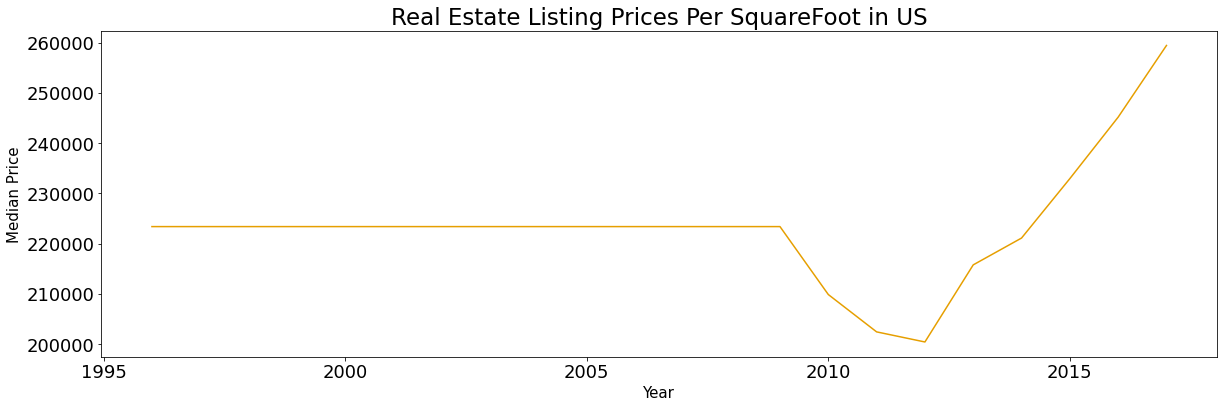

In [ ]:
plt.figure(figsize=(20, 6))
mean_group = State_time_series[['Year','MedianListingPrice_AllHomes']].groupby(['Year'])['MedianListingPrice_AllHomes'].mean()
plt.plot(mean_group, color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Median Price',fontsize = 15)
plt.title('Real Estate Listing Prices Per SquareFoot in US',fontsize = 23)

In [ ]:
Permits=pd.read_csv("kaggle/PERMIT.csv", parse_dates=True)
Permits.Date=pd.to_datetime(Permits.Date)
Permits['Year'] = Permits.Date.dt.year
Permits= Permits[['Year','Permit']]
Permits=Permits.groupby('Year').sum().astype('int64')
Permits.head()

,Permit
Year,
1960,12040
1961,12805
1962,14246
1963,15939
1964,15417


In [ ]:
State_time_series = State_time_series.merge(Permits, on="Year")
print(State_time_series)

            Date  Year    RegionName  ...  ZHVI_TopTier  ZHVI_MiddleTier  Permit
0     1996-04-30  1996       Alabama  ...      140200.0          79500.0   17029
1     1996-04-30  1996       Arizona  ...      168700.0         103600.0   17029
2     1996-04-30  1996      Arkansas  ...      115200.0          64400.0   17029
3     1996-04-30  1996    California  ...      270600.0         157900.0   17029
4     1996-04-30  1996      Colorado  ...      209300.0         128100.0   17029
...          ...   ...           ...  ...           ...              ...     ...
13207 2017-12-31  2017      Virginia  ...      492700.0         246200.0   15415
13208 2017-12-31  2017    Washington  ...      662700.0         351300.0   15415
13209 2017-12-31  2017  WestVirginia  ...      174300.0         103500.0   15415
13210 2017-12-31  2017     Wisconsin  ...      280600.0         169300.0   15415
13211 2017-12-31  2017       Wyoming  ...      315900.0         200200.0   15415

[13212 rows x 11 columns]


In [ ]:
print(State_time_series['Permit'].isna().sum())

0


Text(0.5, 1.0, 'No. of Permits Per Year')

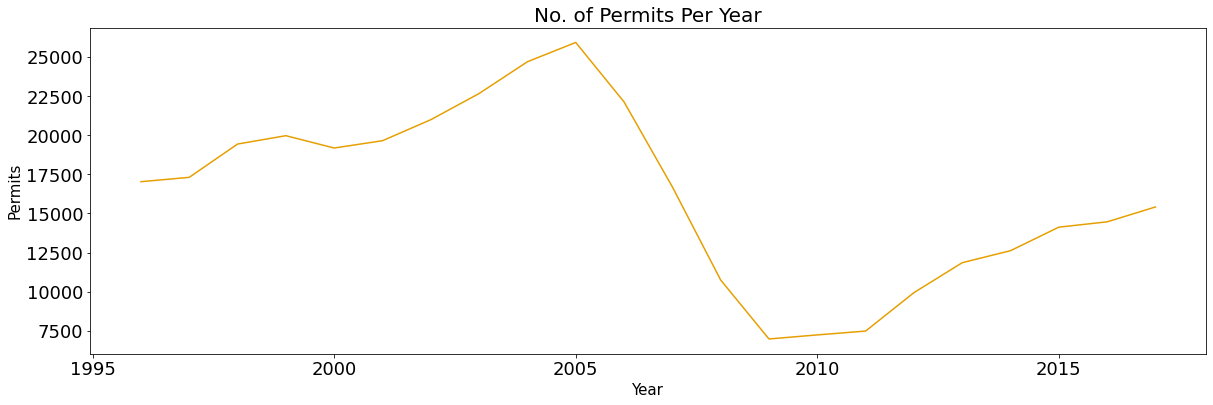

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(State_time_series['Year'],State_time_series['Permit'], color=[230/255, 159/255, 0])

#to change the appearance of ticks, tick labels, and gridlines
plt.tick_params(axis='both', which='major',labelsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Permits', fontsize=15)
plt.title('No. of Permits Per Year', fontsize=20)


In [ ]:
State_time_series['DaysOnZillow_AllHomes'].isna().sum()

0

In [ ]:
newly_built = pd.read_csv('kaggle/Newly_built_house.csv',parse_dates=True)
newly_built.Date = pd.to_datetime(newly_built.Date)
newly_built['Year']= newly_built.Date.dt.year
newly_built = newly_built[['Year','House']]
newly_built = newly_built.groupby('Year').median().astype('int64')
newly_built.head()

,House
Year,
1974,119
1975,144
1976,179
1977,228
1978,224


In [ ]:
State_time_series = State_time_series.merge(newly_built, on='Year')
State_time_series

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House
0,1996-04-30,1996,Alabama,223378.492228,108.5,180900.0,79500.0,45600.0,140200.0,79500.0,17029,192
1,1996-04-30,1996,Arizona,223378.492228,108.5,180900.0,103600.0,67100.0,168700.0,103600.0,17029,192
2,1996-04-30,1996,Arkansas,223378.492228,108.5,180900.0,64400.0,38400.0,115200.0,64400.0,17029,192
3,1996-04-30,1996,California,223378.492228,108.5,180900.0,157900.0,95100.0,270600.0,157900.0,17029,192
4,1996-04-30,1996,Colorado,223378.492228,108.5,180900.0,128100.0,82700.0,209300.0,128100.0,17029,192
...,...,...,...,...,...,...,...,...,...,...,...,...
13207,2017-12-31,2017,Virginia,289000.000000,108.5,180900.0,246200.0,133500.0,492700.0,246200.0,15415,158
13208,2017-12-31,2017,Washington,349950.000000,108.5,180900.0,351300.0,208200.0,662700.0,351300.0,15415,158
13209,2017-12-31,2017,WestVirginia,149900.000000,108.5,180900.0,103500.0,63800.0,174300.0,103500.0,15415,158
13210,2017-12-31,2017,Wisconsin,189900.000000,108.5,180900.0,169300.0,107200.0,280600.0,169300.0,15415,158


In [ ]:
State_time_series['House'].isna().sum()

0

Text(0.5, 1.0, 'No. of New Houses Per Year')

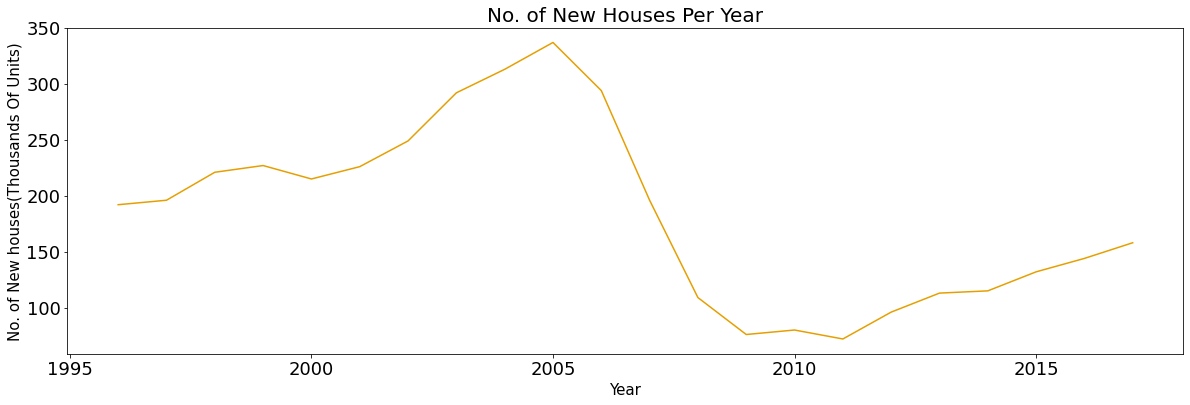

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(State_time_series['Year'],State_time_series['House'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No. of New houses(Thousands Of Units)',fontsize = 15)
plt.title('No. of New Houses Per Year',fontsize = 20)

In [ ]:
GDP = pd.read_csv('kaggle/GDP.csv', parse_dates=True)
GDP.Date = pd.to_datetime(GDP.Date)
GDP['Year'] = GDP.Date.dt.year
GDP = GDP[['Year','GDP']]
GDP = GDP.groupby('Year').median().astype('int64')
GDP.head()

,GDP
Year,
1947,247
1948,275
1949,272
1950,299
1951,347


In [ ]:
State_time_series = State_time_series.merge(GDP, on='Year')
State_time_series

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP
0,1996-04-30,1996,Alabama,223378.492228,108.5,180900.0,79500.0,45600.0,140200.0,79500.0,17029,192,8082
1,1996-04-30,1996,Arizona,223378.492228,108.5,180900.0,103600.0,67100.0,168700.0,103600.0,17029,192,8082
2,1996-04-30,1996,Arkansas,223378.492228,108.5,180900.0,64400.0,38400.0,115200.0,64400.0,17029,192,8082
3,1996-04-30,1996,California,223378.492228,108.5,180900.0,157900.0,95100.0,270600.0,157900.0,17029,192,8082
4,1996-04-30,1996,Colorado,223378.492228,108.5,180900.0,128100.0,82700.0,209300.0,128100.0,17029,192,8082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13207,2017-12-31,2017,Virginia,289000.000000,108.5,180900.0,246200.0,133500.0,492700.0,246200.0,15415,158,19498
13208,2017-12-31,2017,Washington,349950.000000,108.5,180900.0,351300.0,208200.0,662700.0,351300.0,15415,158,19498
13209,2017-12-31,2017,WestVirginia,149900.000000,108.5,180900.0,103500.0,63800.0,174300.0,103500.0,15415,158,19498
13210,2017-12-31,2017,Wisconsin,189900.000000,108.5,180900.0,169300.0,107200.0,280600.0,169300.0,15415,158,19498


In [ ]:
State_time_series['GDP'].isna().sum()

0

Text(0.5, 1.0, 'GDP Per Year')

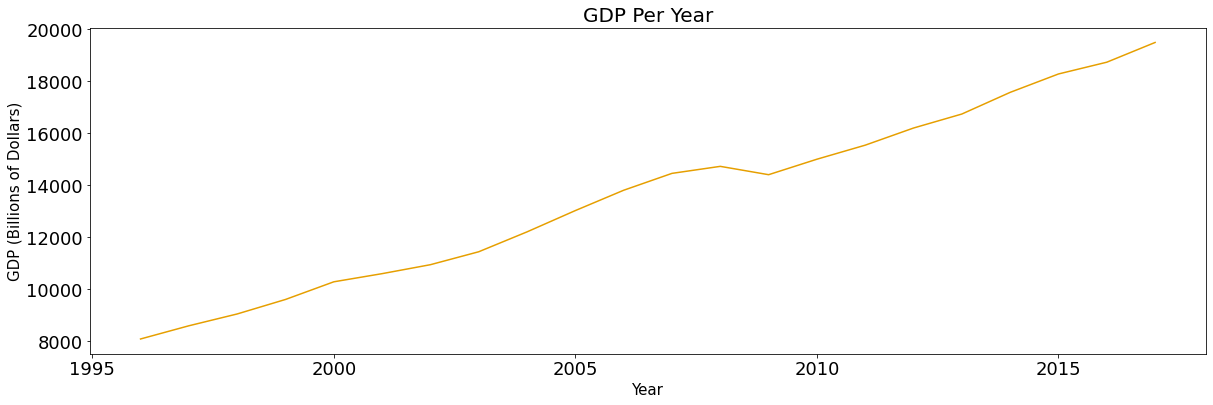

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(State_time_series['Year'],State_time_series['GDP'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('GDP (Billions of Dollars)',fontsize = 15)
plt.title('GDP Per Year',fontsize = 20)

In [ ]:
mortgage=pd.read_csv("kaggle/Mortgage.csv", parse_dates=True)
mortgage.Date=pd.to_datetime(mortgage.Date)
mortgage['Year'] = mortgage.Date.dt.year
mortgage= mortgage[['Year','Mortgage']]
mortgage=mortgage.groupby('Year').median().astype('int64')
mortgage.head()

,Mortgage
Year,
1971,7
1972,7
1973,7
1974,9
1975,9


In [ ]:
State_time_series = State_time_series.merge(mortgage, on="Year")
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage
0,1996-04-30,1996,Alabama,223378.492228,108.5,180900.0,79500.0,45600.0,140200.0,79500.0,17029,192,8082,7
1,1996-04-30,1996,Arizona,223378.492228,108.5,180900.0,103600.0,67100.0,168700.0,103600.0,17029,192,8082,7
2,1996-04-30,1996,Arkansas,223378.492228,108.5,180900.0,64400.0,38400.0,115200.0,64400.0,17029,192,8082,7
3,1996-04-30,1996,California,223378.492228,108.5,180900.0,157900.0,95100.0,270600.0,157900.0,17029,192,8082,7
4,1996-04-30,1996,Colorado,223378.492228,108.5,180900.0,128100.0,82700.0,209300.0,128100.0,17029,192,8082,7


In [ ]:
State_time_series['Mortgage'].isna().sum()

0

Text(0.5, 1.0, 'Mortgage Rate Per Year')

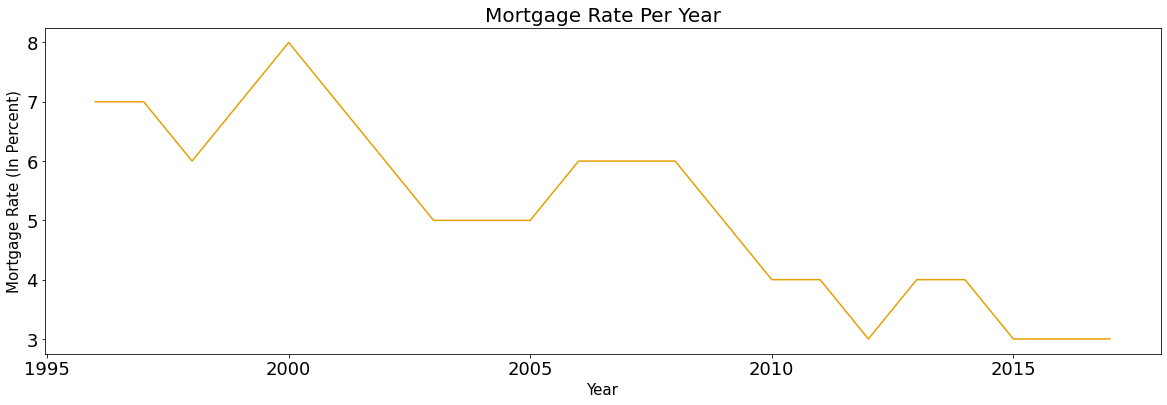

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(State_time_series['Year'],State_time_series['Mortgage'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Mortgage Rate (In Percent)',fontsize = 15)
plt.title('Mortgage Rate Per Year',fontsize = 20)

In [ ]:
wages = pd.read_csv("kaggle/Average_wages.csv", parse_dates=True)
wages.Date = pd.to_datetime(wages.Date)
wages['Year'] = wages.Date.dt.year
wages = wages.groupby('Year').median().astype('int64')
wages

,Wage
Year,
2006,20
2007,20
2008,21
2009,22
2010,22
2011,23
2012,23
2013,23
2014,24


In [ ]:
State_time_series = State_time_series.merge(wages, on='Year')
State_time_series

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage,Wage
0,2006-01-31,2006,Alabama,223378.492228,108.5,180900.0,122800.0,63400.0,225600.0,122800.0,22124,294,13808,6,20
1,2006-01-31,2006,Alaska,223378.492228,108.5,180900.0,250100.0,172700.0,363900.0,250100.0,22124,294,13808,6,20
2,2006-01-31,2006,Arizona,223378.492228,108.5,180900.0,257200.0,164600.0,434900.0,257200.0,22124,294,13808,6,20
3,2006-01-31,2006,Arkansas,223378.492228,108.5,180900.0,98600.0,56000.0,179800.0,98600.0,22124,294,13808,6,20
4,2006-01-31,2006,California,223378.492228,108.5,180900.0,525800.0,328900.0,834500.0,525800.0,22124,294,13808,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,2017-12-31,2017,Virginia,289000.000000,108.5,180900.0,246200.0,133500.0,492700.0,246200.0,15415,158,19498,3,26
7435,2017-12-31,2017,Washington,349950.000000,108.5,180900.0,351300.0,208200.0,662700.0,351300.0,15415,158,19498,3,26
7436,2017-12-31,2017,WestVirginia,149900.000000,108.5,180900.0,103500.0,63800.0,174300.0,103500.0,15415,158,19498,3,26
7437,2017-12-31,2017,Wisconsin,189900.000000,108.5,180900.0,169300.0,107200.0,280600.0,169300.0,15415,158,19498,3,26


In [ ]:
State_time_series.isna().sum()

Date                           0
Year                           0
RegionName                     0
MedianListingPrice_AllHomes    0
DaysOnZillow_AllHomes          0
Sale_Prices                    0
ZHVI_AllHomes                  0
ZHVI_BottomTier                0
ZHVI_TopTier                   0
ZHVI_MiddleTier                0
Permit                         0
House                          0
GDP                            0
Mortgage                       0
Wage                           0
dtype: int64

Text(0.5, 1.0, 'Average Hourly Wage Per Year')

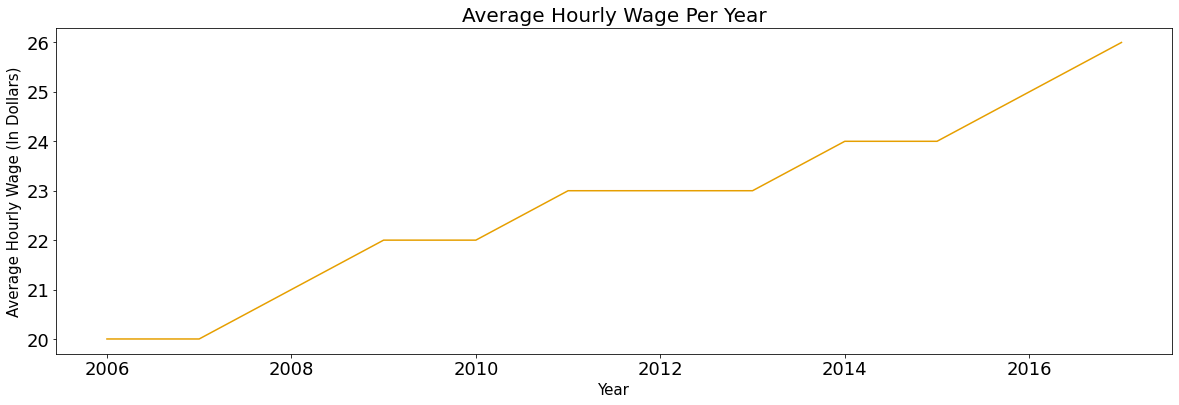

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(State_time_series['Year'],State_time_series['Wage'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Average Hourly Wage (In Dollars)',fontsize = 15)
plt.title('Average Hourly Wage Per Year',fontsize = 20)

In [ ]:


demographic=pd.read_csv("kaggle/demographic.csv", parse_dates=True)
demographic.Date=pd.to_datetime(demographic.Date)
demographic['Year'] = demographic.Date.dt.year
demographic = demographic.iloc[:,[1,2]]
demographic = demographic.groupby('Year').mean().astype('int64')
demographic.head()

,PersonNumber
Year,
1977,136376837
1978,138700543
1979,141044795
1980,143460947
1981,145229156


In [ ]:
State_time_series = State_time_series.merge(demographic, on='Year')
State_time_series

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage,Wage,PersonNumber
0,2006-01-31,2006,Alabama,223378.492228,108.5,180900.0,122800.0,63400.0,225600.0,122800.0,22124,294,13808,6,20,193220149
1,2006-01-31,2006,Alaska,223378.492228,108.5,180900.0,250100.0,172700.0,363900.0,250100.0,22124,294,13808,6,20,193220149
2,2006-01-31,2006,Arizona,223378.492228,108.5,180900.0,257200.0,164600.0,434900.0,257200.0,22124,294,13808,6,20,193220149
3,2006-01-31,2006,Arkansas,223378.492228,108.5,180900.0,98600.0,56000.0,179800.0,98600.0,22124,294,13808,6,20,193220149
4,2006-01-31,2006,California,223378.492228,108.5,180900.0,525800.0,328900.0,834500.0,525800.0,22124,294,13808,6,20,193220149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,2017-12-31,2017,Virginia,289000.000000,108.5,180900.0,246200.0,133500.0,492700.0,246200.0,15415,158,19498,3,26,205599913
7435,2017-12-31,2017,Washington,349950.000000,108.5,180900.0,351300.0,208200.0,662700.0,351300.0,15415,158,19498,3,26,205599913
7436,2017-12-31,2017,WestVirginia,149900.000000,108.5,180900.0,103500.0,63800.0,174300.0,103500.0,15415,158,19498,3,26,205599913
7437,2017-12-31,2017,Wisconsin,189900.000000,108.5,180900.0,169300.0,107200.0,280600.0,169300.0,15415,158,19498,3,26,205599913


Text(0.5, 1.0, 'No. of People Between the Age 15-64 Per Year')

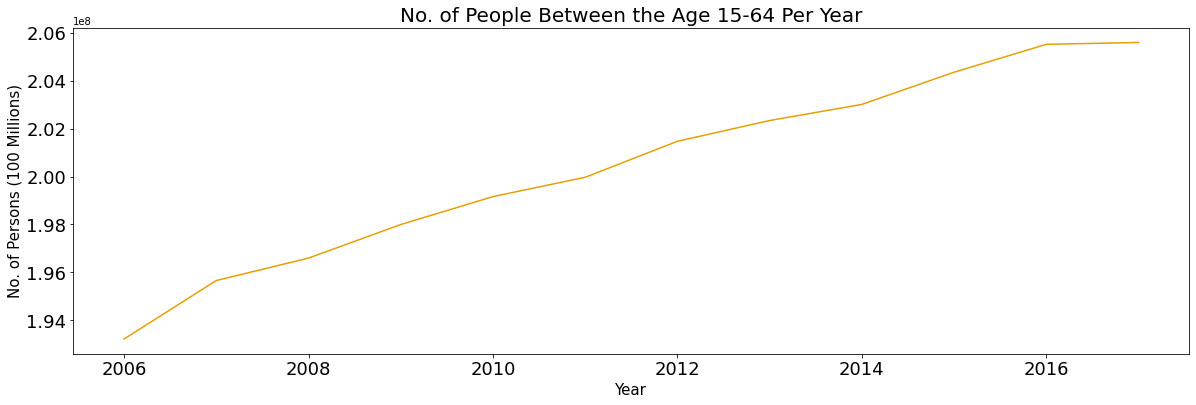

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(State_time_series['Year'],State_time_series['PersonNumber'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Year',fontsize = 15)
plt.ylabel("No. of Persons (100 Millions)",fontsize = 15)
plt.title('No. of People Between the Age 15-64 Per Year',fontsize = 20)

In [ ]:
crime_rates = pd.read_csv('kaggle/crime_data_w_population_and_crime_rate.csv', parse_dates=True)
crime_rates.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,100.0,5706,22329,119,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,100.0,873,3424,8,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,100.0,127,278,1,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,100.0,6,13,0,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,100.0,392,703,3,4,17,368,149,494,60,0,27083,22,31


In [ ]:
crime_rates['FIPS'] = crime_rates['FIPS_ST'].astype(str) + crime_rates['FIPS_CTY'].astype(str)
crime_rates['FIPS'] = crime_rates['FIPS'].astype('int64')
crime_rates = crime_rates[['FIPS', 'crime_rate_per_100000']]
crime_rates.head()

,FIPS,crime_rate_per_100000
0,29510,1791.995377
1,535,1754.914968
2,173,1664.700485
3,48261,1456.310680
4,2231,1447.402430


In [ ]:
hospitals = pd.read_csv("kaggle/Hospitals.csv")
hospitals_per_county = hospitals['COUNTYFIPS'].value_counts().to_frame()
hospitals_per_county.reset_index(level=0, inplace=True)
hospitals_per_county.rename(index=str, columns={"index": "FIPS", "COUNTYFIPS": "NumberOfHospitals"}, inplace=True)
hospitals_per_county.dropna(inplace=True)
hospitals_per_county= hospitals_per_county[hospitals_per_county["FIPS"] != "NOT AVAILABLE"]
hospitals_per_county["FIPS"] = hospitals_per_county["FIPS"].astype("int64")

hospitals_per_county.head()

,FIPS,NumberOfHospitals
0,6037,131
1,48201,93
2,17031,73
3,4013,73
4,48113,58


In [ ]:
county_time_series = pd.read_csv("kaggle/County_time_series.csv")

In [ ]:
crosswalk = pd.read_csv("kaggle/CountyCrossWalk_Zillow.csv")
crosswalk = crosswalk[['FIPS', 'CountyName', 'StateName']]
crosswalk["FIPS"] = crosswalk["FIPS"].astype("int64")
crosswalk.head()

,FIPS,CountyName,StateName
0,42103,Pike,Pennsylvania
1,36005,Bronx,New York
2,34013,Essex,New Jersey
3,36047,Kings,New York
4,34029,Ocean,New Jersey


In [ ]:
house_prices = county_time_series.groupby("RegionName").mean()
team_est = house_prices["ZHVI_AllHomes"].to_frame()
team_est.reset_index(level=0, inplace=True)
team_est.rename(index=str, columns={"RegionName": "FIPS", "ZHVI_AllHomes": "AverageHousePrice"}, inplace=True)
team_est["FIPS"] = team_est["FIPS"].astype("int64")
team_est.dropna(inplace=True)

team_est.head()

,FIPS,AverageHousePrice
0,1001,114483.665339
1,1003,164861.685824
4,1009,106357.471264
14,1033,92332.051282
20,1049,98315.492958


In [ ]:
public_schools = pd.read_csv(r"kaggle/Public_Schools.csv")
public_schools_per_county = public_schools['COUNTYFIPS'].value_counts().to_frame()
public_schools_per_county.reset_index(level=0, inplace=True)
public_schools_per_county.rename(index=str, columns={"index": "FIPS", "COUNTYFIPS": "NumberOfSchools"}, inplace=True)
public_schools_per_county["FIPS"] = public_schools_per_county["FIPS"].astype("int64")
public_schools_per_county.head()

,FIPS,NumberOfSchools
0,6037,2277
1,17031,1326
2,4013,1246
3,48201,1125
4,6073,763


In [ ]:
#1
team_est = team_est.merge(crosswalk, on="FIPS")
team_est.head()

,FIPS,AverageHousePrice,CountyName,StateName
0,1001,114483.665339,Autauga,Alabama
1,1003,164861.685824,Baldwin,Alabama
2,1009,106357.471264,Blount,Alabama
3,1033,92332.051282,Colbert,Alabama
4,1049,98315.492958,De Kalb,Alabama


In [ ]:
#2
team_est = team_est.merge(public_schools_per_county, on="FIPS")
team_est.head()

,FIPS,AverageHousePrice,CountyName,StateName,NumberOfSchools
0,1001,114483.665339,Autauga,Alabama,15
1,1003,164861.685824,Baldwin,Alabama,47
2,1009,106357.471264,Blount,Alabama,20
3,1033,92332.051282,Colbert,Alabama,27
4,1049,98315.492958,De Kalb,Alabama,20


In [ ]:
#3
team_est = team_est.merge(hospitals_per_county, on="FIPS")
team_est.head()

,FIPS,AverageHousePrice,CountyName,StateName,NumberOfSchools,NumberOfHospitals
0,1001,114483.665339,Autauga,Alabama,15,1
1,1003,164861.685824,Baldwin,Alabama,47,4
2,1009,106357.471264,Blount,Alabama,20,1
3,1033,92332.051282,Colbert,Alabama,27,2
4,1049,98315.492958,De Kalb,Alabama,20,1


In [ ]:
#4
team_est = team_est.merge(crime_rates, on="FIPS")
team_est['RegionName'] = team_est['StateName']
team_est.head()

,FIPS,AverageHousePrice,CountyName,StateName,NumberOfSchools,NumberOfHospitals,crime_rate_per_100000,RegionName
0,1103,106889.361702,Morgan,Alabama,47,4,254.618615,Alabama
1,1113,103098.467433,Russell,Alabama,19,2,449.777629,Alabama
2,1115,134092.720307,Saint Clair,Alabama,28,1,203.920842,Alabama
3,1117,164133.333333,Shelby,Alabama,53,3,176.804780,Alabama
4,1123,110576.923077,Tallapoosa,Alabama,13,2,497.536587,Alabama


In [ ]:
#5
State_time_series =State_time_series.merge(team_est,on='RegionName')
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage,Wage,PersonNumber,FIPS,AverageHousePrice,CountyName,StateName,NumberOfSchools,NumberOfHospitals,crime_rate_per_100000
0,2006-01-31,2006,Alabama,223378.492228,108.5,180900.0,122800.0,63400.0,225600.0,122800.0,22124,294,13808,6,20,193220149,1103,106889.361702,Morgan,Alabama,47,4,254.618615
1,2006-01-31,2006,Alabama,223378.492228,108.5,180900.0,122800.0,63400.0,225600.0,122800.0,22124,294,13808,6,20,193220149,1113,103098.467433,Russell,Alabama,19,2,449.777629
2,2006-01-31,2006,Alabama,223378.492228,108.5,180900.0,122800.0,63400.0,225600.0,122800.0,22124,294,13808,6,20,193220149,1115,134092.720307,Saint Clair,Alabama,28,1,203.920842
3,2006-01-31,2006,Alabama,223378.492228,108.5,180900.0,122800.0,63400.0,225600.0,122800.0,22124,294,13808,6,20,193220149,1117,164133.333333,Shelby,Alabama,53,3,176.804780
4,2006-01-31,2006,Alabama,223378.492228,108.5,180900.0,122800.0,63400.0,225600.0,122800.0,22124,294,13808,6,20,193220149,1123,110576.923077,Tallapoosa,Alabama,13,2,497.536587


 **Feature Selection:**

In [ ]:
#feature selection
State_time_series.columns

Index(['Date', 'Year', 'RegionName', 'MedianListingPrice_AllHomes',
       'DaysOnZillow_AllHomes', 'Sale_Prices', 'ZHVI_AllHomes',
       'ZHVI_BottomTier', 'ZHVI_TopTier', 'ZHVI_MiddleTier', 'Permit', 'House',
       'GDP', 'Mortgage', 'Wage', 'PersonNumber', 'FIPS', 'AverageHousePrice',
       'CountyName', 'StateName', 'NumberOfSchools', 'NumberOfHospitals',
       'crime_rate_per_100000'],
      dtype='object')

In [ ]:
#for time-series analysis
State_time_series_analysis=State_time_series.copy(deep=True)

In [ ]:
del State_time_series['Date']
del State_time_series['StateName']
del State_time_series['CountyName']
del State_time_series['FIPS']
del State_time_series['RegionName']


In [ ]:
State_time_series.columns

Index(['Year', 'MedianListingPrice_AllHomes', 'DaysOnZillow_AllHomes',
       'Sale_Prices', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_TopTier',
       'ZHVI_MiddleTier', 'Permit', 'House', 'GDP', 'Mortgage', 'Wage',
       'PersonNumber', 'AverageHousePrice', 'NumberOfSchools',
       'NumberOfHospitals', 'crime_rate_per_100000'],
      dtype='object')

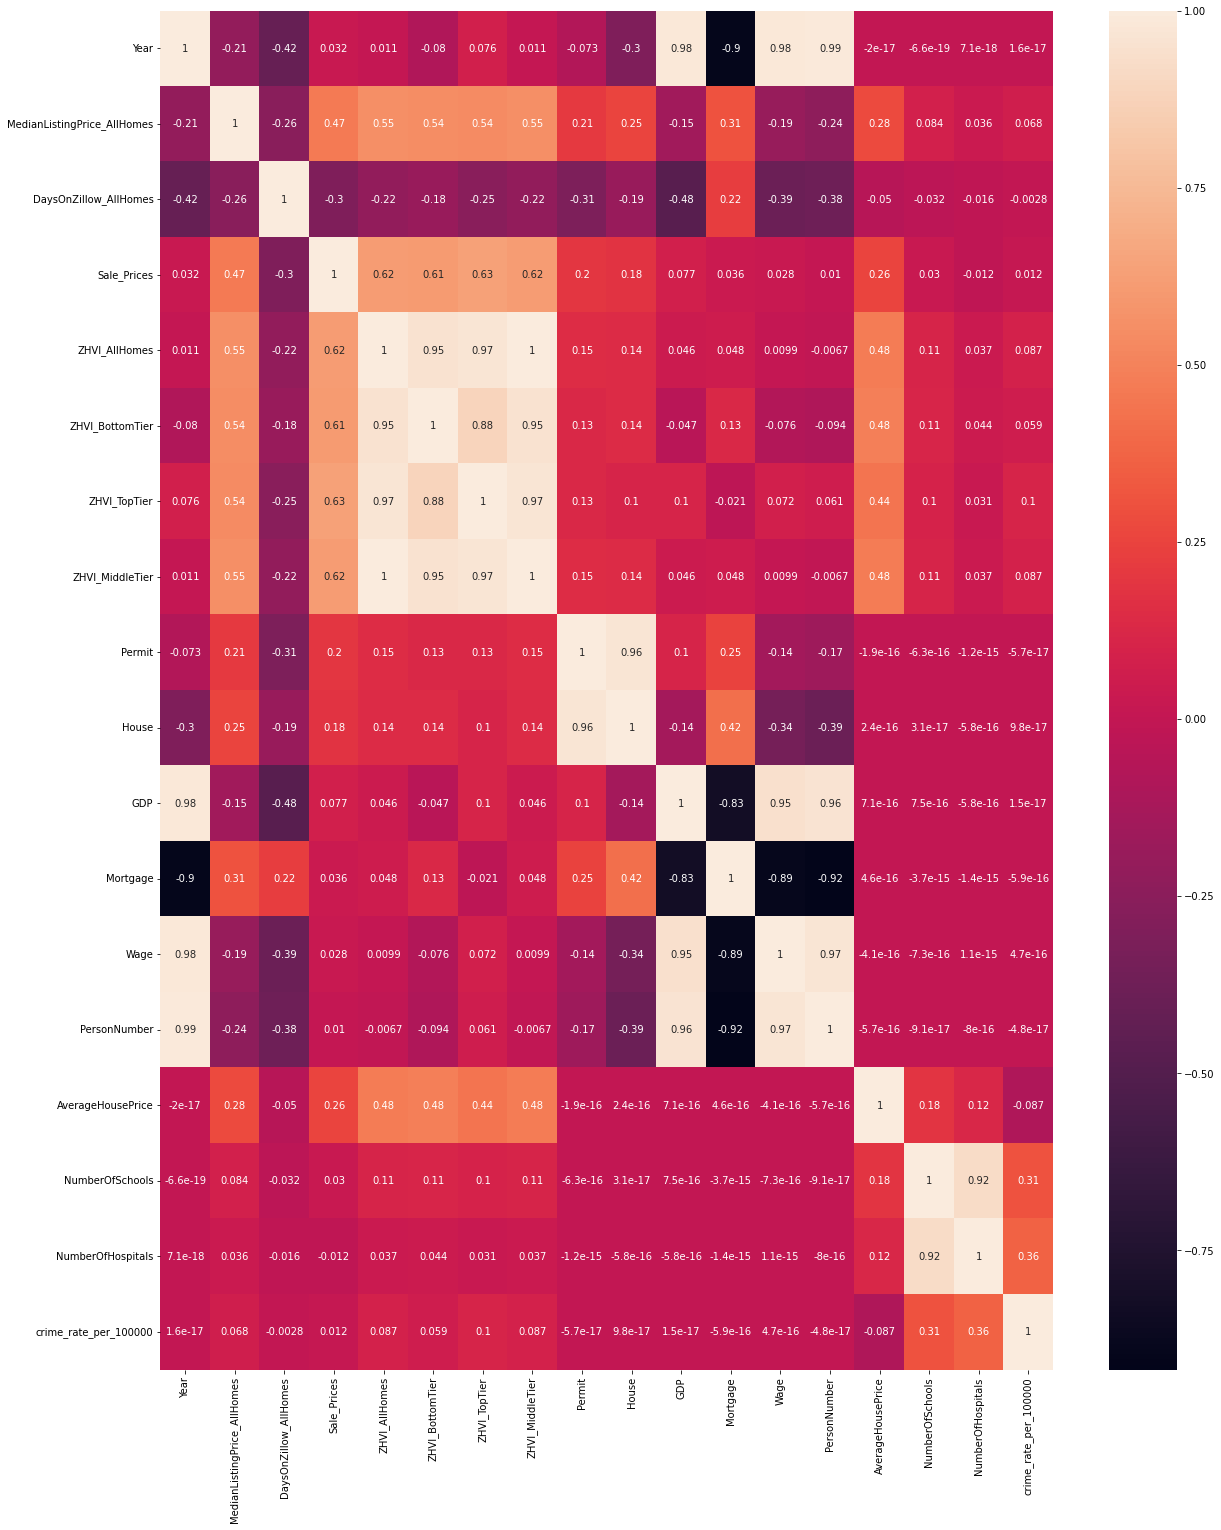

In [ ]:
#co-relation heat map as we get quantative answer about features that contribute to the target label and how by much
plt.figure(figsize=(20,25))
sns.heatmap(State_time_series.corr(), annot=True)

In [ ]:
x, y = State_time_series.loc[:, State_time_series.columns != 'ZHVI_AllHomes'], State_time_series.loc[:,'ZHVI_AllHomes']

In [ ]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
test_x, train_x, test_y, train_y = train_test_split(x, y, test_size = 0.25, random_state=1)

# **Linear Regression**

In [ ]:
xgb_r = xg.XGBRegressor(objective="reg:linear", colsample_bytree=0.3, learning_rate = 0.1, max_depth = 5, alpha=10, random_state=1, n_estimators=100)

In [ ]:
xgb_r.fit(train_x, train_y)
predicted_y = xgb_r.predict(test_x)

[04:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_r.feature_importances_

array([0.00541206, 0.04859648, 0.00941174, 0.17262836, 0.05696636,
       0.3508434 , 0.26991525, 0.00502045, 0.00191803, 0.00476162,
       0.01409582, 0.02047379, 0.01699643, 0.01271463, 0.00305282,
       0.00440865, 0.00278407], dtype=float32)

In [ ]:
State_time_series.columns

Index(['Year', 'MedianListingPrice_AllHomes', 'DaysOnZillow_AllHomes',
       'Sale_Prices', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_TopTier',
       'ZHVI_MiddleTier', 'Permit', 'House', 'GDP', 'Mortgage', 'Wage',
       'PersonNumber', 'AverageHousePrice', 'NumberOfSchools',
       'NumberOfHospitals', 'crime_rate_per_100000'],
      dtype='object')

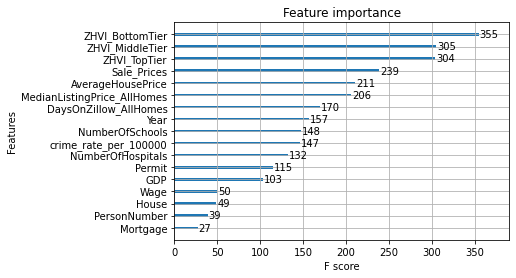

In [ ]:
plot_importance(xgb_r)
plt.show()

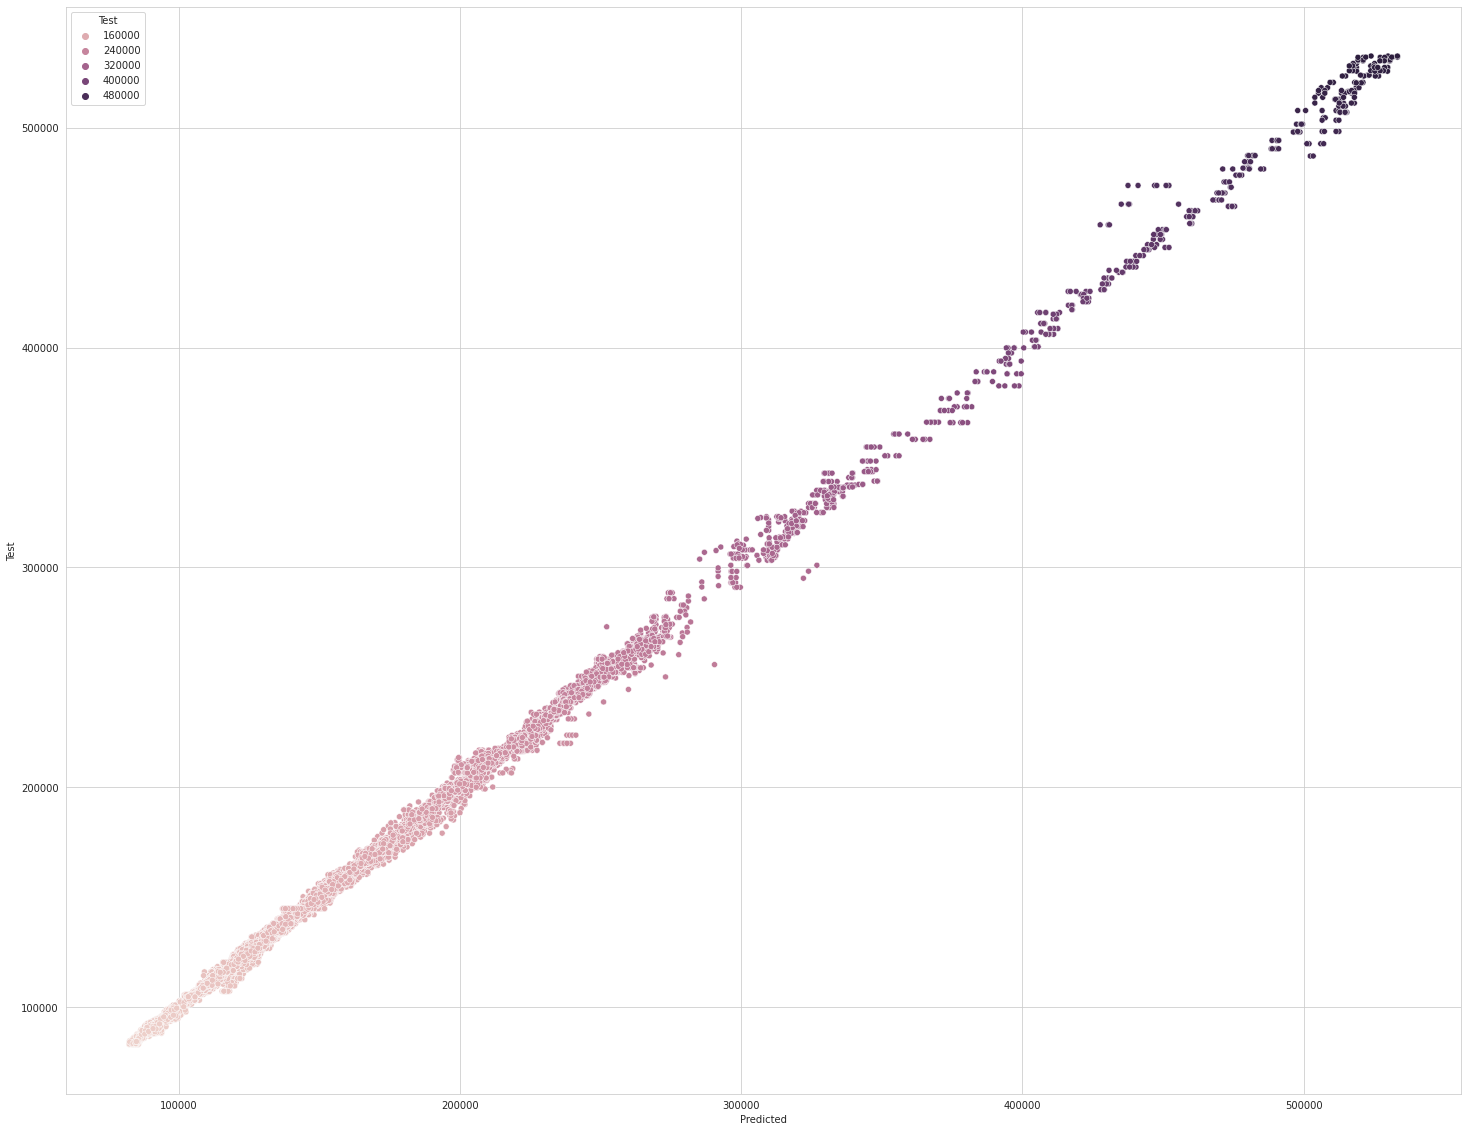

In [ ]:
plt.figure(figsize=(25, 20))
df = pd.DataFrame(list(zip(predicted_y, test_y)), 
               columns =['Predicted', 'Test']) 
sns.set_style("whitegrid") 
  
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test')

 **Parameter Tuning:**

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
colsample_bytree=1, max_depth=7)

In [ ]:
xgb_r.fit(train_x, train_y)

[04:01:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

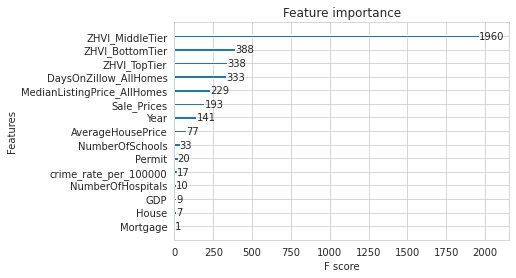

In [ ]:
plot_importance(xgb_r)
plt.show()

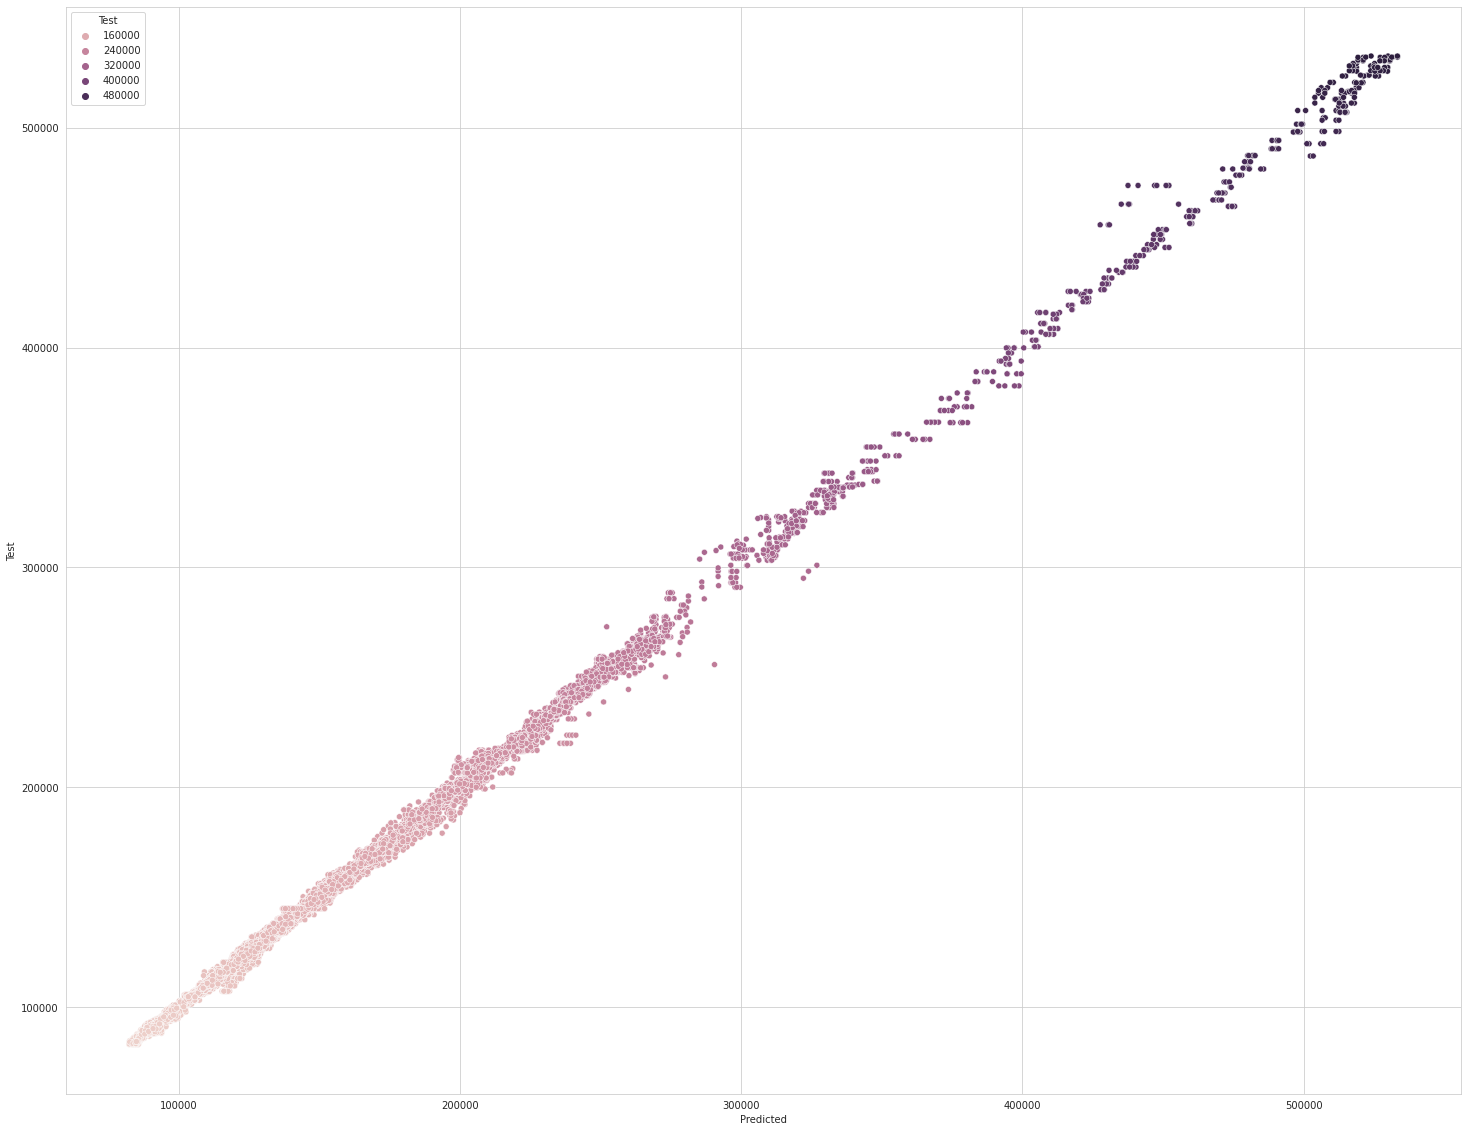

In [ ]:
plt.figure(figsize=(25,20))
df = pd.DataFrame(list(zip(predicted_y, test_y)), columns = ['Predicted', 'Test'])
sns.set_style("whitegrid")
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test')

**Accuracy Measure:**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error
mse=mean_squared_error(test_y,predicted_y)
print(mse)
mae=mean_absolute_error(test_y,predicted_y)
print(mae)
rmse=np.sqrt(mean_squared_error(test_y,predicted_y))
print(rmse)

4109059.7702161456
1358.8291012821203
2027.081589432489


In [ ]:
#r2-score
acc_LR = r2_score(test_y, predicted_y)
print("r2-score: ",acc_LR)

r2-score:  0.9983201274997857


**Predicting Values:**

In [ ]:
temp = State_time_series.loc[:, State_time_series.columns != 'ZHVI_AllHomes']
temp = temp.iloc[0:0]
temp.loc[-1] = [2006, 224000,	110,	181900.0, 59400.0,	225600.0,	122800.0,	22124,	294,	13808,	6,	20,	193220149,	106889.361702,	47,	4,	254.618615]
temp.index = temp.index + 1
temp

,Year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage,Wage,PersonNumber,AverageHousePrice,NumberOfSchools,NumberOfHospitals,crime_rate_per_100000
0,2006.0,224000.0,110.0,181900.0,59400.0,225600.0,122800.0,22124.0,294.0,13808.0,6.0,20.0,193220149.0,106889.361702,47.0,4.0,254.618615


In [ ]:
result_pred = xgb_r.predict(temp) 
print(result_pred)

[122881.445]


## **Random Forest Regression**

In [ ]:
#creating an object
regressor = RandomForestRegressor(n_estimators = 500, random_state=1, max_features='auto')

#training the model on the training set
regressor.fit(np.array(train_x),train_y)                                    

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
predicted_y_rf = regressor.predict(test_x)
print(predicted_y_rf)       

[413392.8 169299.8 105500.  ... 141087.2  95501.8 455626.4]


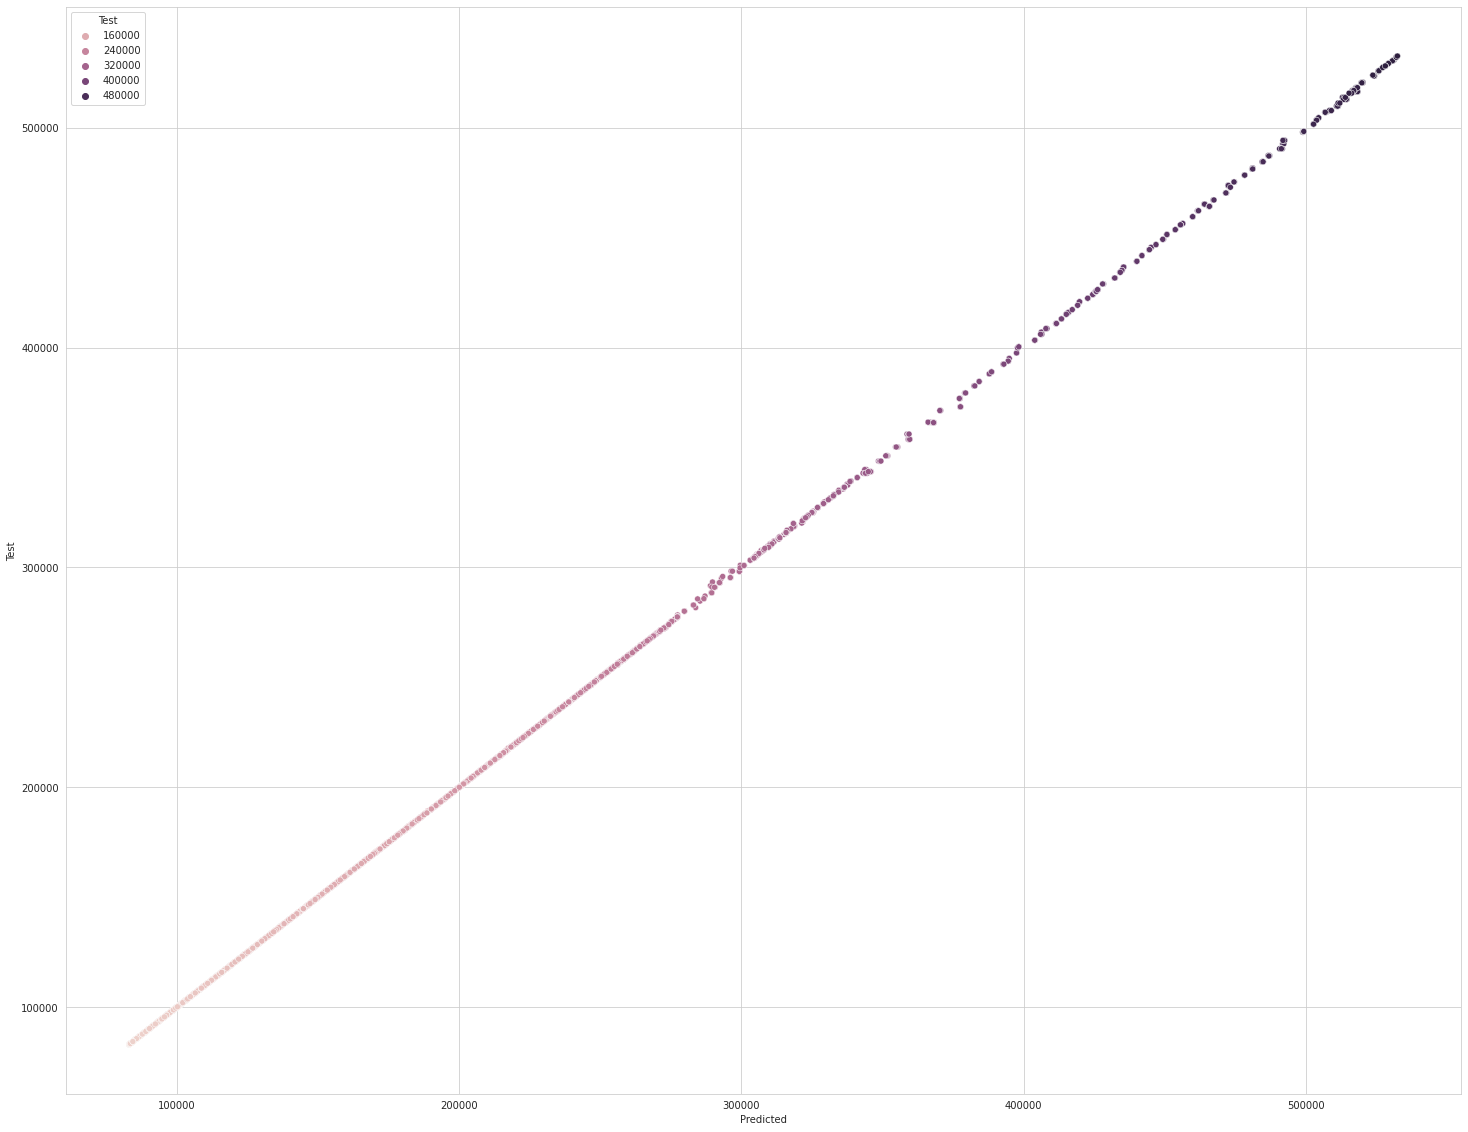

In [ ]:
plt.figure(figsize=(25,20)) 
df = pd.DataFrame(list(zip(predicted_y_rf, test_y)), columns = ['Predicted', 'Test'])
sns.set_style("whitegrid")
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test')

 **Accuracy Measures:**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error
mse=mean_squared_error(test_y,predicted_y_rf)
print(mse)
mae=mean_absolute_error(test_y,predicted_y_rf)
print(mae)
rmse=np.sqrt(mean_squared_error(test_y,predicted_y_rf))
print(rmse)

10216.240427971556
10.762386950904515
101.07541950430657


In [ ]:
#r2-score
acc_RF = r2_score(test_y, predicted_y_rf)
print("r2-score: ",acc_RF)

r2-score:  0.9999958233799676


**Predicting Value:**

In [ ]:
temp = State_time_series.loc[:, State_time_series.columns != 'ZHVI_AllHomes']
temp = temp.iloc[0:0]
temp.loc[-1] = [2006, 224000,	110,	181900.0, 59400.0,	225600.0,	122800.0,	22124,	294,	13808,	6,	20,	193220149,	106889.361702,	47,	4,	254.618615]
temp.index = temp.index + 1
temp

,Year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage,Wage,PersonNumber,AverageHousePrice,NumberOfSchools,NumberOfHospitals,crime_rate_per_100000
0,2006.0,224000.0,110.0,181900.0,59400.0,225600.0,122800.0,22124.0,294.0,13808.0,6.0,20.0,193220149.0,106889.361702,47.0,4.0,254.618615


In [ ]:
result_pred = xgb_r.predict(temp) 
print(result_pred)

[122881.445]


## **Gradient Boosting Regression:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Creating an object of Gradient Boosting Regressor 
clf=GradientBoostingRegressor(n_estimators=800, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')

In [ ]:
#Fitting the model on training data
clf.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#predicting the y values fot test_x values
predict_y=clf.predict(test_x)

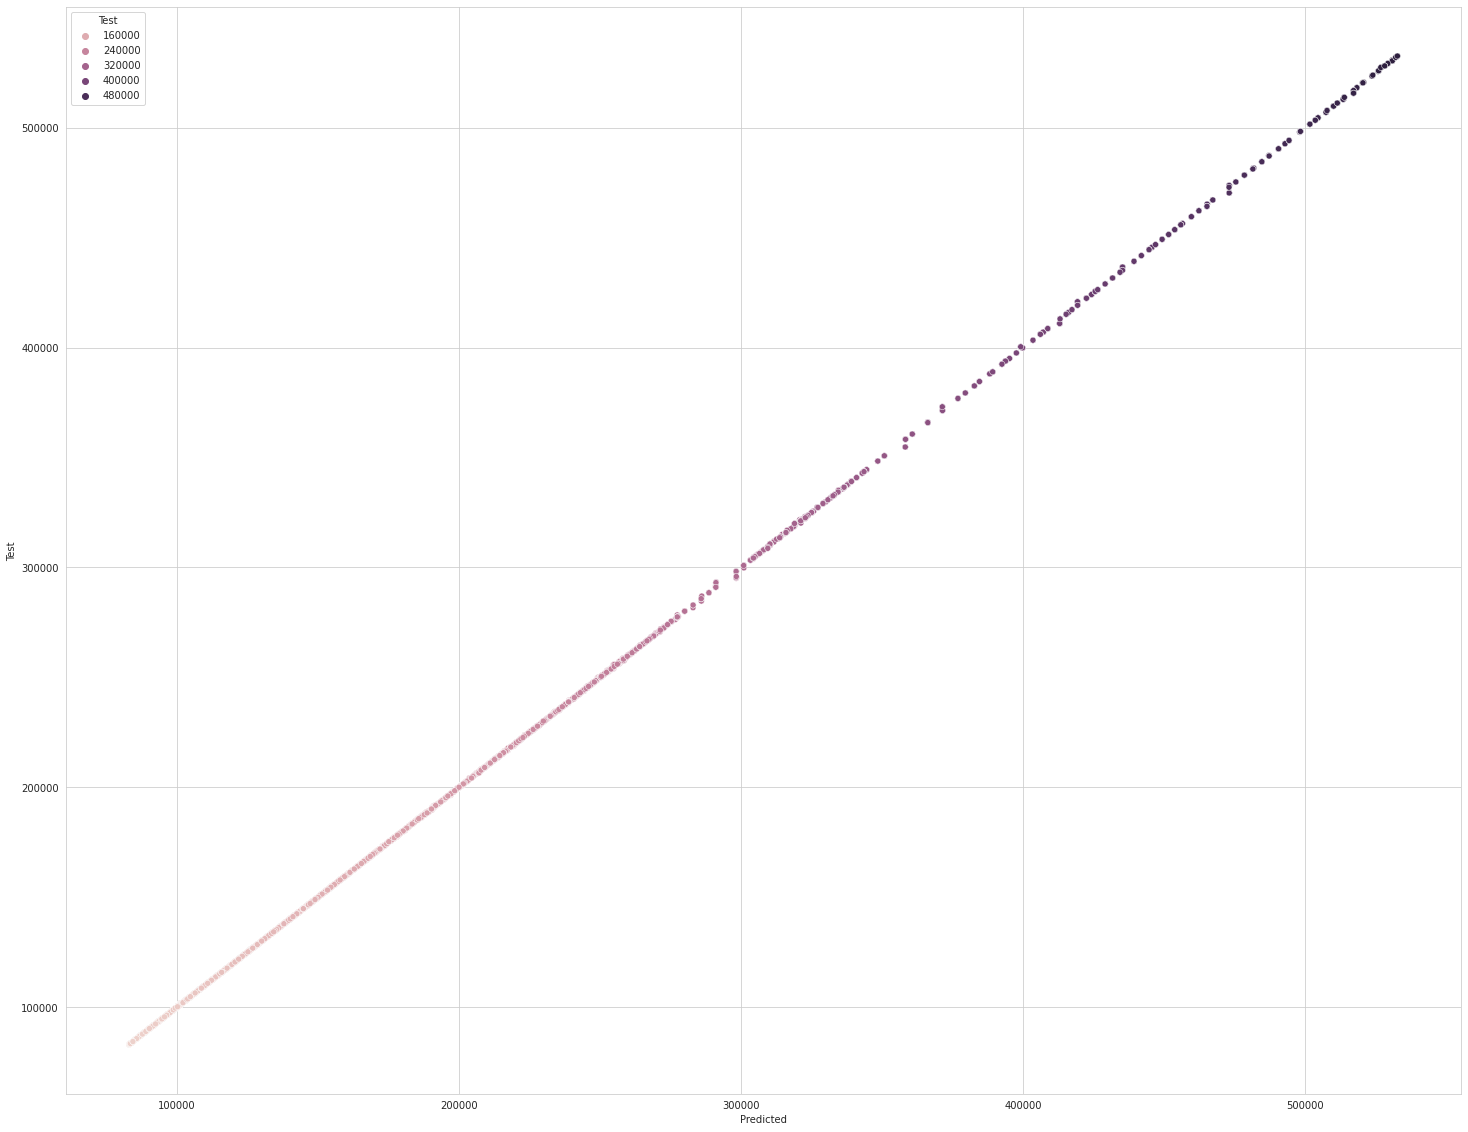

In [ ]:
plt.figure(figsize=(25, 20))
df = pd.DataFrame(list(zip(predict_y, test_y)), 
               columns =['Predicted', 'Test']) 
sns.set_style("whitegrid") 
  
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test')

**Accuracy Measure:**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error
mse=mean_squared_error(test_y,predict_y)
print(mse)
mae=mean_absolute_error(test_y,predict_y)
print(mae)
rmse=np.sqrt(mean_squared_error(test_y,predict_y))
print(rmse)

8257.198417245681
29.72772565226384
90.86912796569405


In [ ]:
print("r2_square:",r2_score(test_y,predict_y))

r2_square: 0.9999966242787096


**Predicting Value:**

In [ ]:
temp = State_time_series.loc[:, State_time_series.columns != 'ZHVI_AllHomes']
temp = temp.iloc[0:0]
temp.loc[-1] = [2017, 224000,220	,	181900.0, 59400.0,	225600.0,	122800.0,	22124,	294,	13808,	6,	20,	193220149,	106889.361702,	47,	4,	254.618615]
temp.index = temp.index + 1
temp=temp.sort_index()
temp

,Year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage,Wage,PersonNumber,AverageHousePrice,NumberOfSchools,NumberOfHospitals,crime_rate_per_100000
0,2017.0,224000.0,220.0,181900.0,59400.0,225600.0,122800.0,22124.0,294.0,13808.0,6.0,20.0,193220149.0,106889.361702,47.0,4.0,254.618615


In [ ]:
result_pred = clf.predict(temp) 
print(result_pred)

[122620.8594138]


## **AdaBoost Regression:**

In [ ]:
#Creating an object of  AdaBoost Regression
ad=AdaBoostRegressor(n_estimators=800,learning_rate=0.1, loss='square')


In [ ]:
#Fitting the model
ad.fit(train_x,train_y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
                  n_estimators=800, random_state=None)

In [ ]:
#Prediting the y values for test_x
predicted_y=ad.predict(test_x)

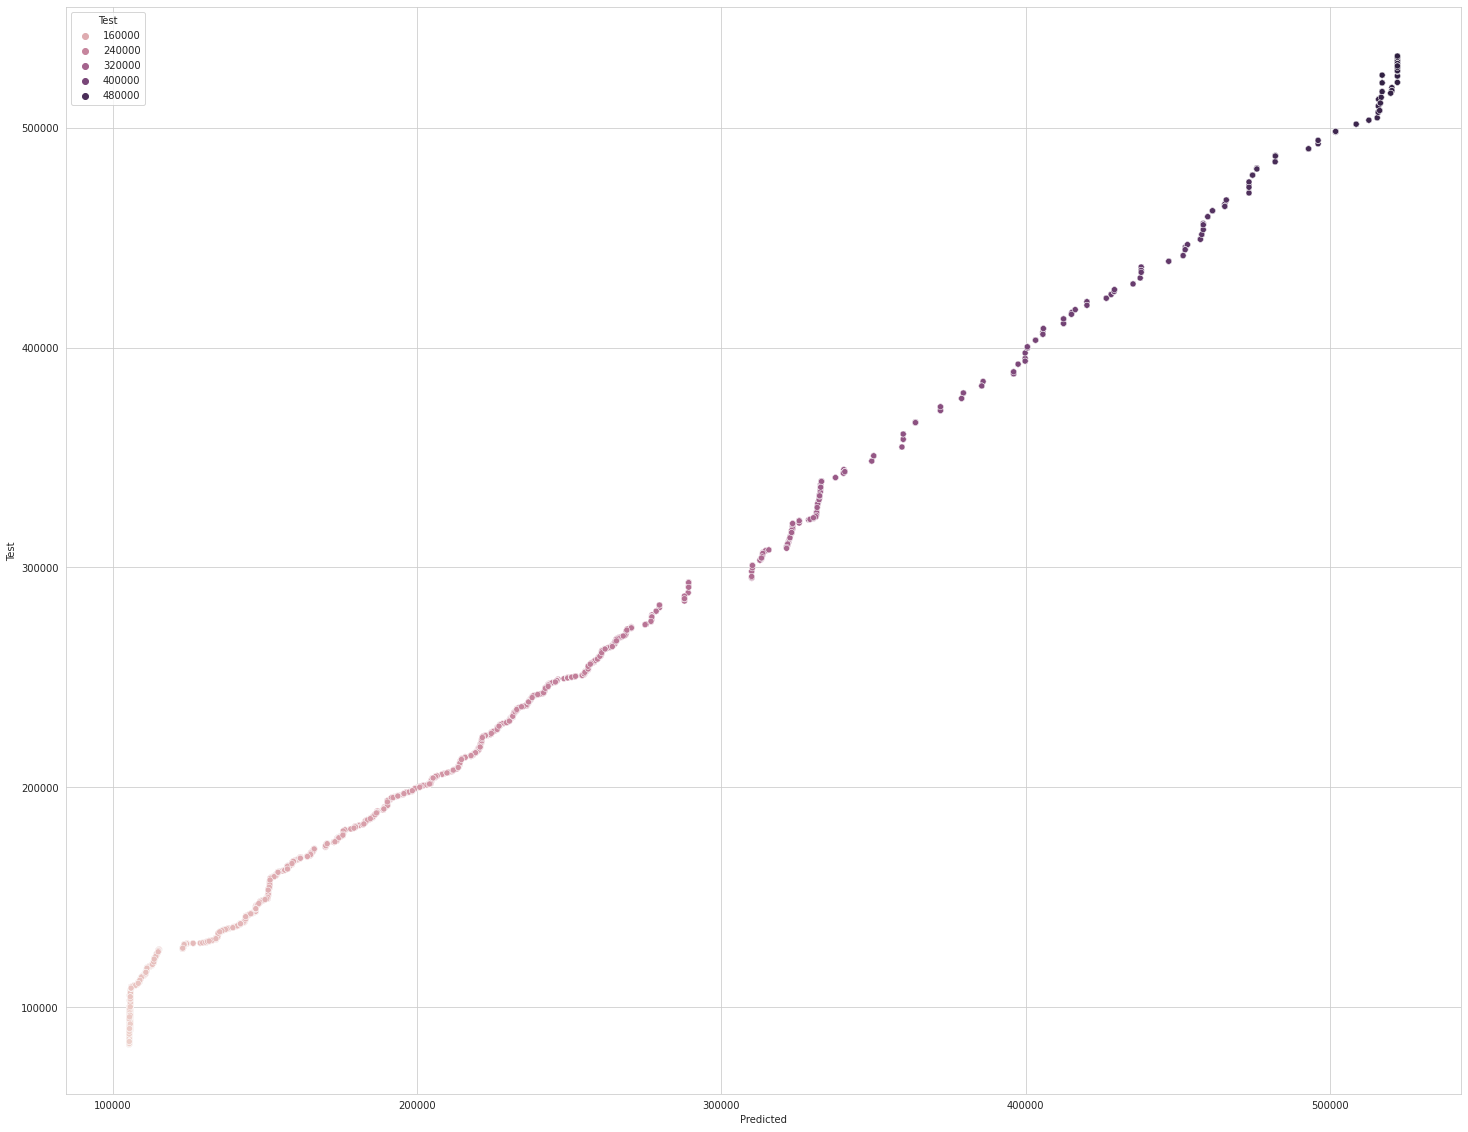

In [ ]:
plt.figure(figsize=(25, 20))
df = pd.DataFrame(list(zip(predicted_y, test_y)), columns =['Predicted', 'Test']) 
sns.set_style("whitegrid") 
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test')

**Accuracy Measure:**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error
mse=mean_squared_error(test_y,predicted_y)
print(mse)
mae=mean_absolute_error(test_y,predicted_y)
print(mae)
rmse=np.sqrt(mean_squared_error(test_y,predicted_y))
print(rmse)

32276677.35822345
4508.239059848207
5681.2566706868165


In [ ]:
print("r2_square:",r2_score(test_y,predicted_y))

r2_square: 0.9868045962520727


**Predicting Value:**

In [ ]:
temp = State_time_series.loc[:, State_time_series.columns != 'ZHVI_AllHomes']
temp = temp.iloc[0:0]
temp.loc[-1] = [2017, 224000,220	,	181900.0, 59400.0,	225600.0,	122800.0,	22124,	294,	13808,	6,	20,	193220149,	106889.361702,	47,	4,	254.618615]
temp.index = temp.index + 1
temp=temp.sort_index()
temp

,Year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,House,GDP,Mortgage,Wage,PersonNumber,AverageHousePrice,NumberOfSchools,NumberOfHospitals,crime_rate_per_100000
0,2017.0,224000.0,220.0,181900.0,59400.0,225600.0,122800.0,22124.0,294.0,13808.0,6.0,20.0,193220149.0,106889.361702,47.0,4.0,254.618615


In [ ]:
result_pred = ad.predict(temp) 
print(result_pred)

[113931.49623727]


## **Data Visualization**

 **The dataframe which will be used for Data Visulaization**

In [ ]:
State_time_series_analysis.columns

Index(['Date', 'Year', 'RegionName', 'MedianListingPrice_AllHomes',
       'DaysOnZillow_AllHomes', 'Sale_Prices', 'ZHVI_AllHomes',
       'ZHVI_BottomTier', 'ZHVI_TopTier', 'ZHVI_MiddleTier', 'Permit', 'House',
       'GDP', 'Mortgage', 'Wage', 'PersonNumber', 'FIPS', 'AverageHousePrice',
       'CountyName', 'StateName', 'NumberOfSchools', 'NumberOfHospitals',
       'crime_rate_per_100000'],
      dtype='object')

**Creating two dataframes by grouping them by RegionName. In one dataframe we have sorted the Median Price List in descending order whereas in the other we have sorted the Median List Price in ascending order**

In [ ]:
df1=State_time_series_analysis.groupby('RegionName',as_index=False)['MedianListingPrice_AllHomes'].mean().sort_values('MedianListingPrice_AllHomes',ascending=False)
df2=State_time_series_analysis.groupby('RegionName',as_index=False)['MedianListingPrice_AllHomes'].mean().sort_values('MedianListingPrice_AllHomes',ascending=True)


**Top 7 regions with highest Median List price**

In [ ]:
print(df1.head(7))

    RegionName  MedianListingPrice_AllHomes
4   California                302419.821315
5     Colorado                273306.480048
19     Montana                250460.184909
14    Maryland                248674.379354
1       Alaska                242116.299493
27    Virginia                241144.386298
2      Arizona                230942.001871


**7 regions with least Median List Price**

In [ ]:
print(df2.head(7))

   RegionName  MedianListingPrice_AllHomes
9     Indiana                162985.150187
10       Iowa                169152.379354
18   Missouri                169655.028659
11     Kansas                170497.959215
3    Arkansas                171990.084215
12   Kentucky                172912.577270
23   Oklahoma                174160.261298


In [ ]:
%matplotlib inline
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

statelist1=['California','Colorado','Montana','Maryland','Alaska','Virginia','Arizona']


In [ ]:
stateseries1=pd.DataFrame(State_time_series_analysis[(State_time_series_analysis['RegionName'].isin(statelist1))][['Year','RegionName','MedianListingPrice_AllHomes']].groupby(['Year','RegionName'])['RegionName','MedianListingPrice_AllHomes'].mean().unstack())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


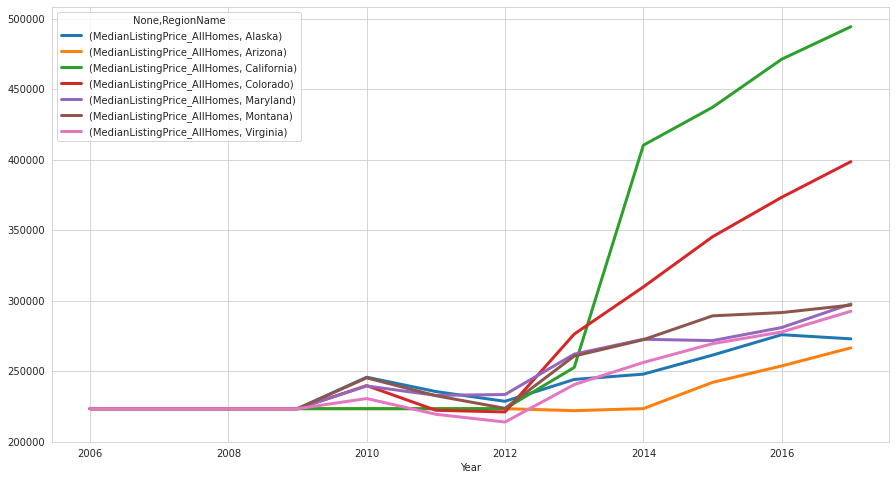

In [ ]:
stateseries1.plot(figsize=(15,8),linewidth=3)
plt.show()



*   **In the above graph we can observe that Highest median list price is in 
California and Colorado.**
*   **We can observe that in Arizona, Virginia, Maryland the median price list is not too high. Also the prices are growing over the years.**
*   **Therefore buying a property for investment purpose in these regions would be preferable.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


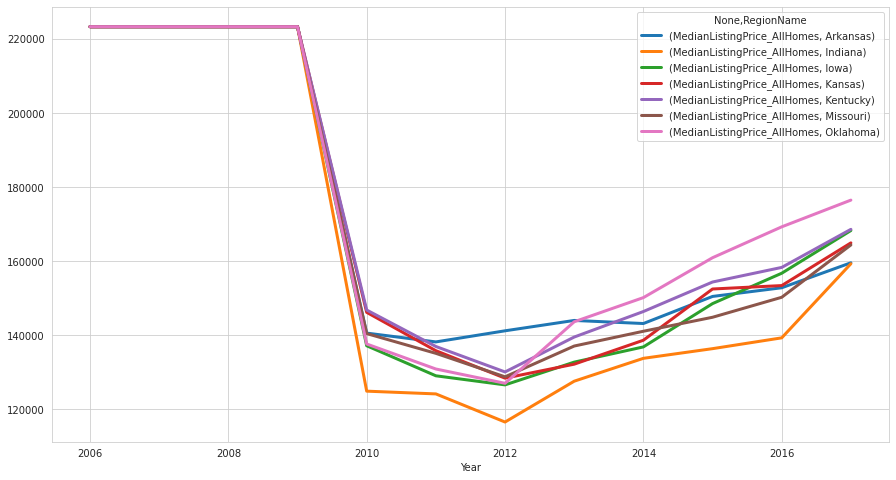

In [ ]:
statelist2=['Indiana','Iowa','Missouri','Kansas','Arkansas','Kentucky','Oklahoma']
stateseries2=pd.DataFrame(State_time_series_analysis[(State_time_series_analysis['RegionName'].isin(statelist2))][['Year','RegionName','MedianListingPrice_AllHomes']].groupby(['Year','RegionName'])['RegionName','MedianListingPrice_AllHomes'].mean().unstack())
stateseries2.plot(figsize=(15,8),linewidth=3)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
sns.set()
season=State_time_series_analysis

**In order to analyse how the Median price changes over the months**


In [ ]:
season['Date']=State_time_series_analysis.Date
season['Year']=State_time_series_analysis.Year
season['Month']=State_time_series_analysis['Date'].dt.month

**Plotting a pivot table where index is Months, columns is Year and values are Median List Price**



In [ ]:
pivot=pd.pivot_table(season,index='Month',columns='Year',values='MedianListingPrice_AllHomes',aggfunc=np.mean)

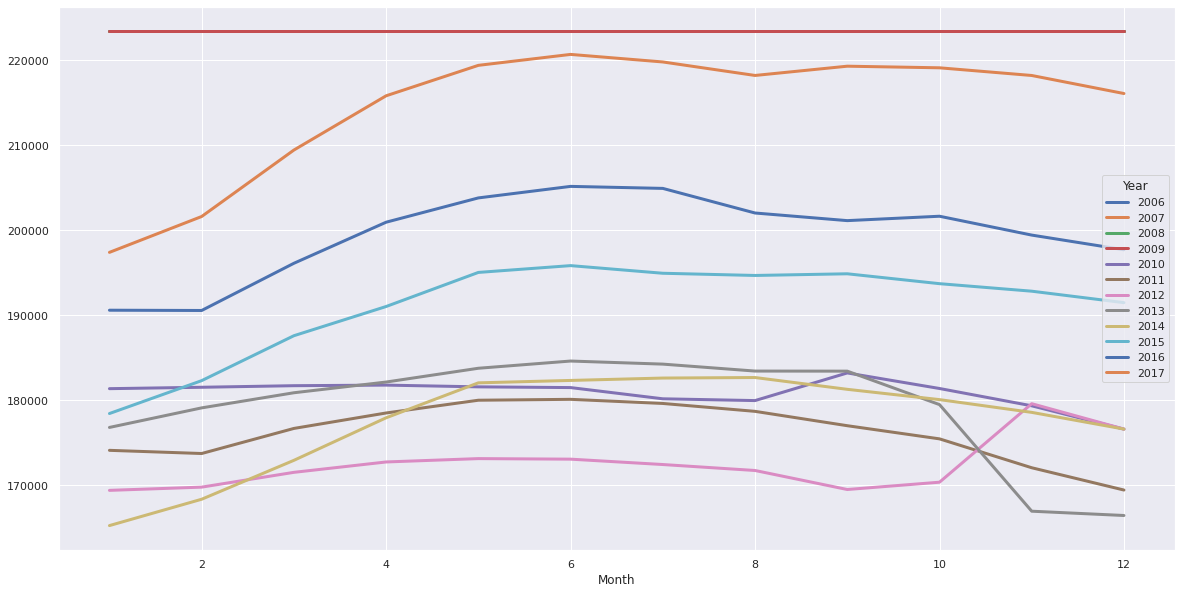

In [ ]:
pivot.plot(figsize=(20,10),linewidth=3)
plt.show()

**Correaltion between MedianListingPrice_AllHomes and GDP**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


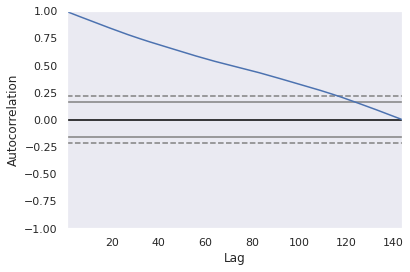

In [ ]:
corelation1=State_time_series_analysis.groupby('Date')['Date','Sale_Prices','GDP'].mean()
pd.plotting.autocorrelation_plot(corelation1)

**Here we can observe that MedainListing Price_AllHomes and GDP are positively corelated.**
**As the GDP will increase per capita income will increase, demand for property will increase therefore price for property will also increase.**

In [ ]:
corelation1.diff().corr()

,Sale_Prices,GDP
Sale_Prices,1.000000,0.155706
GDP,0.155706,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


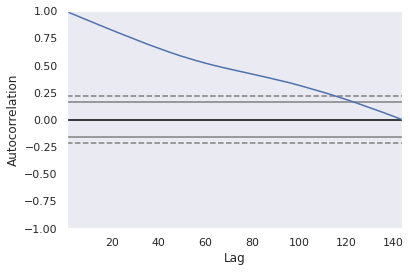

In [ ]:
corelation2=State_time_series_analysis.groupby('Date')['Date','MedianListingPrice_AllHomes','ZHVI_TopTier','ZHVI_MiddleTier','ZHVI_BottomTier'].mean()
pd.plotting.autocorrelation_plot(corelation2) 

In [ ]:
corelation2.corr()

,MedianListingPrice_AllHomes,ZHVI_TopTier,ZHVI_MiddleTier,ZHVI_BottomTier
MedianListingPrice_AllHomes,1.000000,0.516763,0.767053,0.925218
ZHVI_TopTier,0.516763,1.000000,0.925702,0.666000
ZHVI_MiddleTier,0.767053,0.925702,1.000000,0.896967
ZHVI_BottomTier,0.925218,0.666000,0.896967,1.000000


**This graph helps to analyse the trend of MedianListingPrice_AllHomes over the years.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

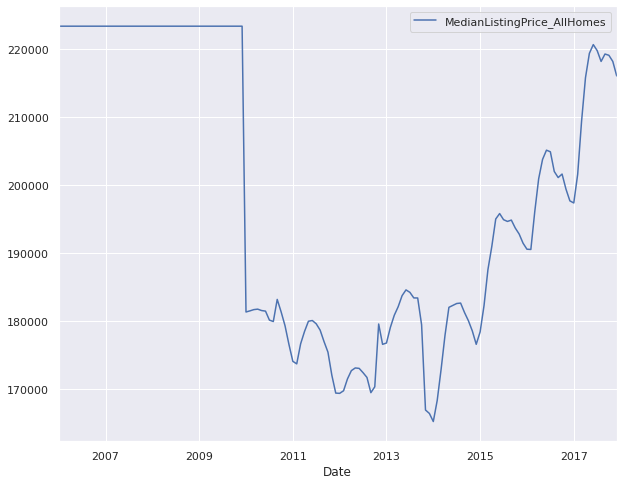

In [ ]:
allHomes=State_time_series_analysis.groupby('Date')['Date','MedianListingPrice_AllHomes'].mean()
allHomes.plot(figsize=(10,8))
plt.show

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import seaborn as sns

In [ ]:
#sns.pairplot(State_time_series_analysis)

**This plot shows the histogram of MedianListing Prices_AllHomes.
We can observe that the prices of most houses are in the range of 200000 and 250000.**

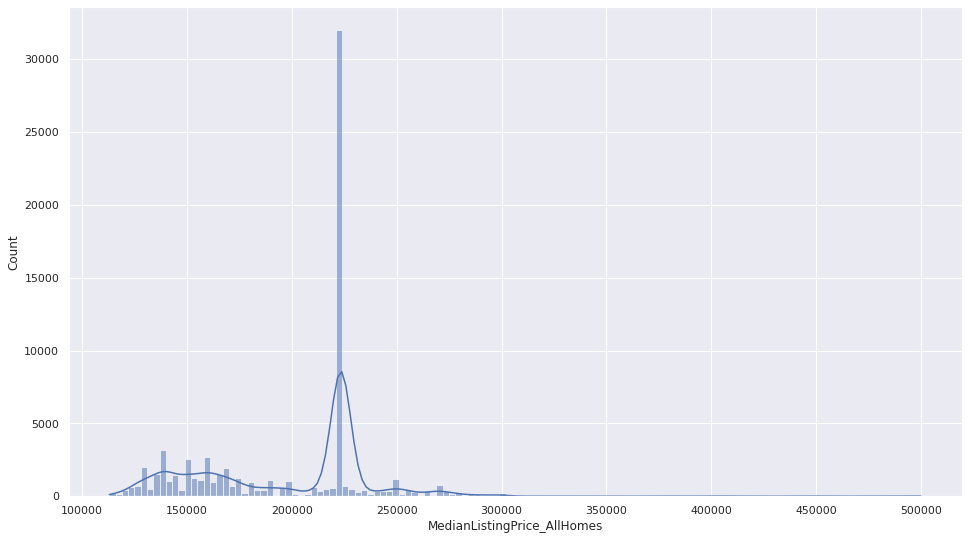

In [ ]:
plt.figure(figsize=(16,9)) 
sns.set()
sns.histplot(State_time_series_analysis['MedianListingPrice_AllHomes'],kde=True)


**This plot shows the histogram of Average House price.**
**We can oberve that average prices of most houses are in range of 50000 to 150000**

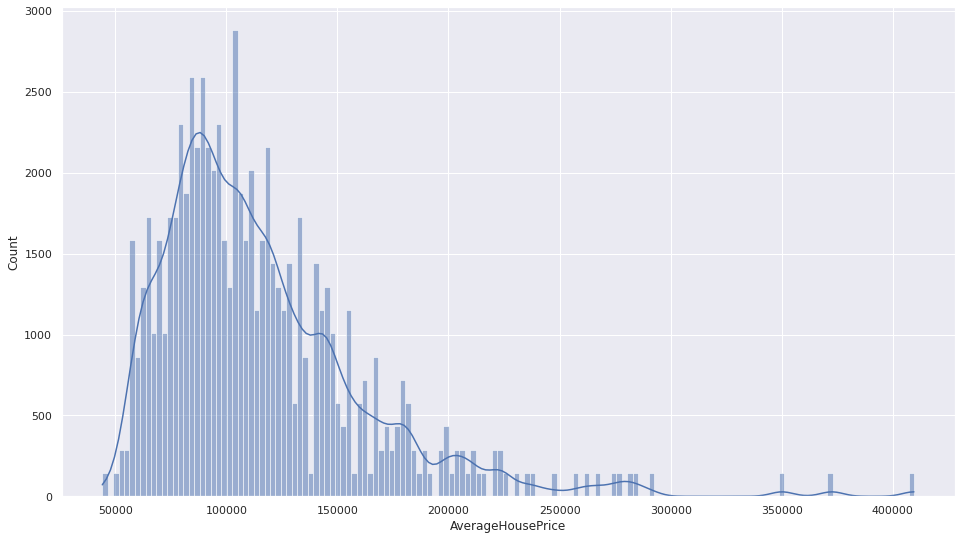

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(State_time_series_analysis['AverageHousePrice'],kde=True)

**We grouped the data by regions and plotted the bar graph vs Median List price.**
**We observed that property is most expensive in California.**

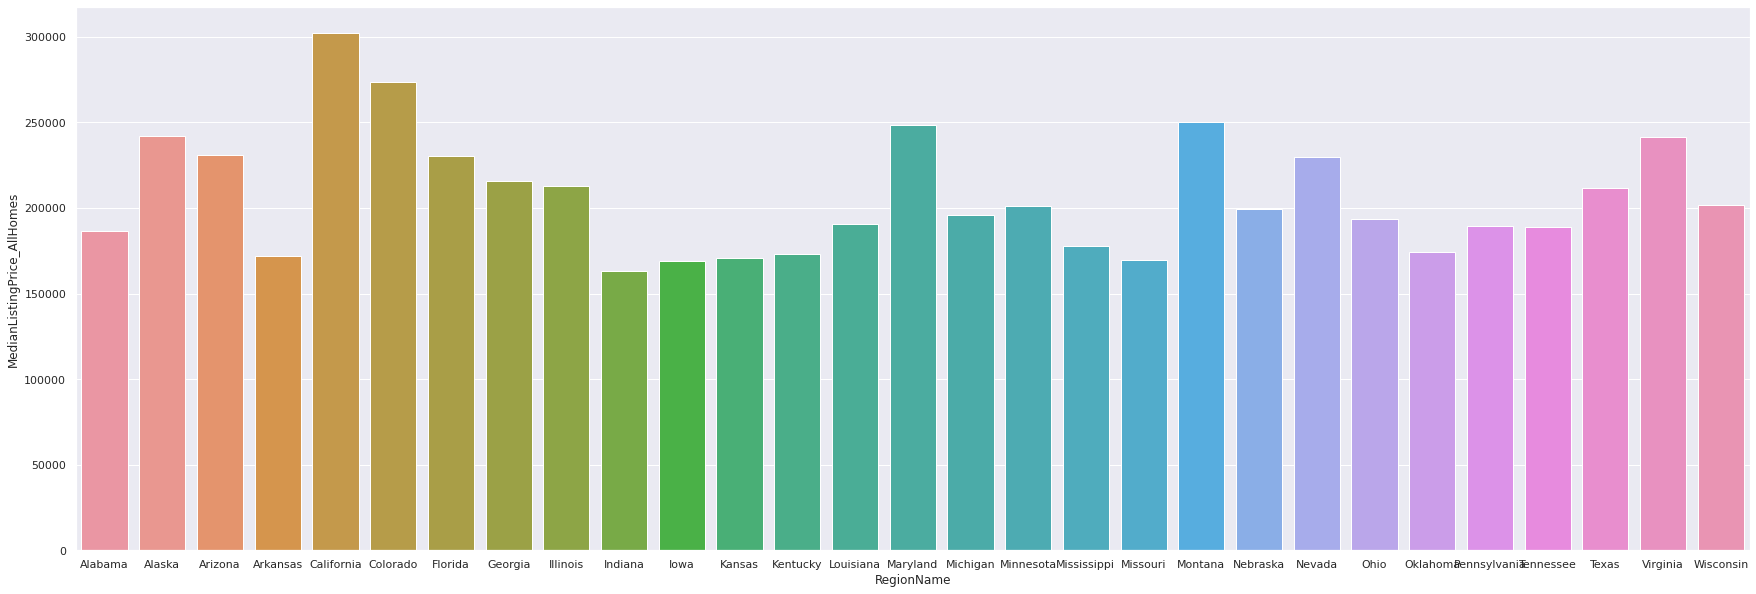

In [ ]:
plt.figure(figsize=(30,10))
df=State_time_series_analysis.groupby('RegionName',as_index=False)['MedianListingPrice_AllHomes'].mean()
df1=df['MedianListingPrice_AllHomes']
labels=df.RegionName
sns.barplot(x=labels,y=df1)

**We grouped the data by region and plotted a bar graph of Region vs Average house Price.**
**We observed that average house is highest in Alaska.**

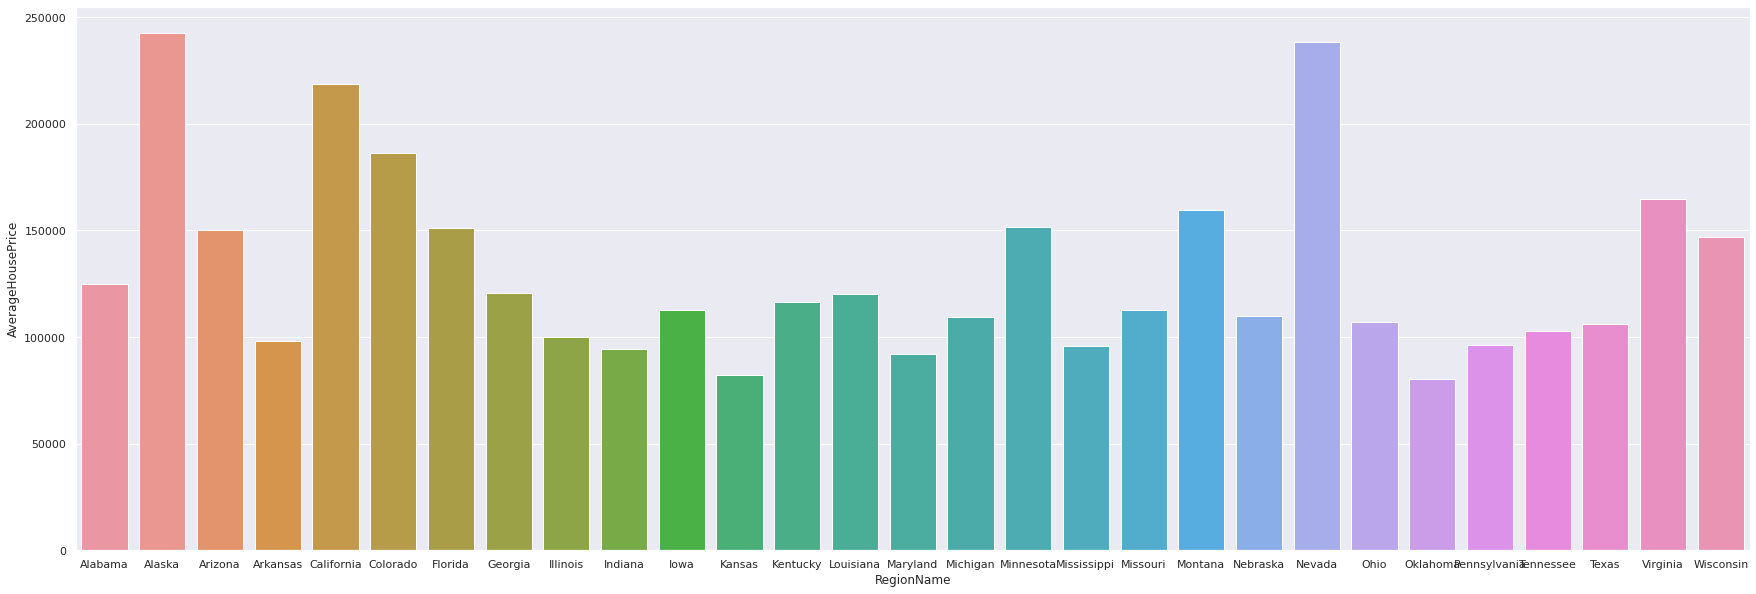

In [ ]:
plt.figure(figsize=(30,10))
df=State_time_series_analysis.groupby('RegionName',as_index=False)['AverageHousePrice'].mean()
df1=df['AverageHousePrice']
labels=df.RegionName
sns.barplot(x=labels,y=df1)